In [209]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
import numpy as np

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [210]:
#training data from https://github.com/IdleHandsProject/makennbot
x_train = [
  [ 0.0, 0.0, 0.0, 0.0, 0.0],
  [ 1.0, 1.0, 1.0, 1.0, 1.0],
  [ 0.0, 0.0, 1.0, 0.0, 0.0],
  [ 0.0, 1.0, 1.0, 1.0, 0.0],
  [ 0.5, 0.5, 0.5, 0.5, 0.5],
  [ 0.0, 0.0, 0.5, 0.0, 0.0],
]
y_train = [
  [ 1.0, 1.0],
  [ 0.0, 0.0],
  [ 0.6, 0.7],
  [ 0.8, 0.2],
  [ 0.6, 0.6],
  [ 0.5, 0.6],
]

x_train = np.array(x_train)
y_train = np.array(y_train)

In [211]:
model = Sequential()

IN = x_train.shape[1]
HIDDEN = IN + 1
OUT = y_train.shape[1]

model.add(Dense(units=HIDDEN, activation='sigmoid', input_dim=IN, dtype='float16'))
model.add(Dense(units=OUT, activation='sigmoid', dtype='float16'))

model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(learning_rate=0.5, momentum=0.9))


In [212]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        #self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        
        plt.grid(True)
        plt.plot(self.x, self.losses, label="loss")
        #plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

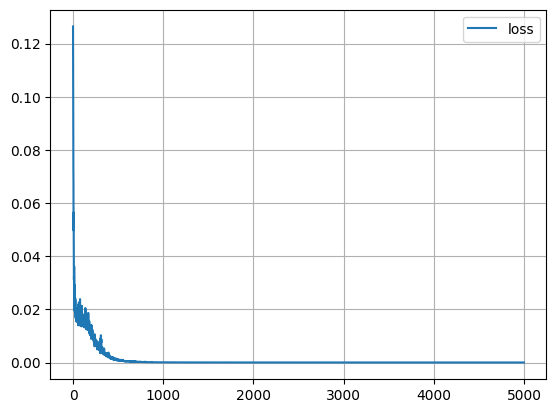

In [213]:
#callback = keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001)
history = model.fit(x_train, y_train, epochs=5000, batch_size=1, verbose=False, callbacks=[plot_losses])

In [214]:
print('loss:\t', history.history['loss'][-1])
preds = model.predict(x_train).tolist()
for i, pred in enumerate(preds):
    print('model:\t', np.round(pred,2))
    print('label:\t', y_train[i])
    print(' ')

loss:	 6.091594696044922e-05
1/1 [==============================] - 0s 146ms/step
model:	 [0.98 0.98]
label:	 [1. 1.]
 
model:	 [0.01 0.01]
label:	 [0. 0.]
 
model:	 [0.6 0.7]
label:	 [0.6 0.7]
 
model:	 [0.8 0.2]
label:	 [0.8 0.2]
 
model:	 [0.6 0.6]
label:	 [0.6 0.6]
 
model:	 [0.5 0.6]
label:	 [0.5 0.6]
 


In [215]:
def to_str(name, W):
    s = str(W.tolist()).replace('[', '').replace(']', '\n').replace(',', '\nlong ')
    return 'f'+name+'\nlong ' + s + 'fEnd'+name

In [216]:
# output weights as strings you can copy into arduino sketch
W1 = np.vstack((K.eval(model.weights[0]), K.eval(model.weights[1])))
W2 = np.vstack((K.eval(model.weights[2]), K.eval(model.weights[3])))

print('// replace these two lines in spin2 code:')
print('// float HiddenWeights[InputNodes+1][HiddenNodes]')
print('// float OutputWeights[HiddenNodes+1][OutputNodes]')
print('// With trained weights below.')
print('\n')
print(to_str('HiddenWeights', W1))
print(to_str('OutputWeights', W2))

// replace these two lines in spin2 code:
// float HiddenWeights[InputNodes+1][HiddenNodes]
// float OutputWeights[HiddenNodes+1][OutputNodes]
// With trained weights below.


fHiddenWeights
long -1.8837890625
long  0.5009765625
long  -0.5
long  0.3486328125
long  -0.5068359375
long  -1.484375

long  0.806640625
long  -2.666015625
long  1.537109375
long  -2.0625
long  1.0087890625
long  -2.05078125

long  2.40625
long  6.71484375
long  -0.6962890625
long  6.171875
long  -1.00390625
long  -0.77587890625

long  0.036773681640625
long  -1.625
long  1.69921875
long  -1.578125
long  1.0673828125
long  -2.05078125

long  -1.7978515625
long  0.5361328125
long  -0.771484375
long  0.3486328125
long  -0.77099609375
long  -1.51953125

long  -1.9599609375
long  -1.0107421875
long  -2.07421875
long  -0.845703125
long  -0.732421875
long  5.859375

fEndHiddenWeights
fOutputWeights
long 3.767578125
long  2.69140625

long  -4.05078125
long  -3.6484375

long  0.0048370361328125
long  -2.58984375

long  